<a href="https://colab.research.google.com/github/henriqueheros/an-lise-de-ativo-I/blob/main/_a_que_vale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
## Run This Cell for Colab
!pip install yfinance
!pip install vectorbt
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 526 kB 5.2 MB/s 
     |████████████████████████████████| 292 kB 48.2 MB/s 
     |████████████████████████████████| 1.6 MB 38.8 MB/s 
     |████████████████████████████████| 749 kB 61.5 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 48 kB/s 


In [ ]:
import vectorbt as vbt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Definindo parâmetros

In [ ]:
# Análise de um Ativo Americano
codigo = 'AAPL'
ativos_comparacao = [codigo, '^GSPC', 'AMZN', 'NFLX']

data_inicial = '2018-01-01'  
data_final = '2019-01-01'

# Os preços de fechamentos dos ativos
vbt.YFData.download(ativos_comparacao, start=data_inicial, end=data_final).get('Close')

symbol,AAPL,^GSPC,AMZN,NFLX
Date,,,,
2018-01-02 05:00:00+00:00,40.950500,2695.810059,59.450500,201.070007
2018-01-03 05:00:00+00:00,40.943352,2713.060059,60.209999,205.050003
2018-01-04 05:00:00+00:00,41.133545,2723.989990,60.479500,205.630005
2018-01-05 05:00:00+00:00,41.601860,2743.149902,61.457001,209.990005
2018-01-08 05:00:00+00:00,41.447334,2747.709961,62.343498,212.050003
...,...,...,...,...
2018-12-24 05:00:00+00:00,35.429192,2351.100098,67.197998,233.880005
2018-12-26 05:00:00+00:00,37.924171,2467.699951,73.544998,253.669998
2018-12-27 05:00:00+00:00,37.678047,2488.830078,73.082001,255.570007


## Baixando os dados

In [ ]:
precos = vbt.YFData.download(codigo, start=data_inicial, end=data_final).get()
fechamento = vbt.YFData.download(codigo, start=data_inicial, end=data_final).get('Close')

# Analisando a Série

In [ ]:
fechamento.vbt.plot().show()

In [ ]:
precos.vbt.ohlcv.plot().show()

## Gráfico comparativo

Com investimento inicial de \$1 (ou R\$ 1)

In [ ]:
vbt.YFData.download(ativos_comparacao,
                    start=data_inicial,
                    end=data_final).plot(column='Close', base=1).show()

## Gráfico Quant Stat

Retorno Cumulativo, Drawdown e Retorno Diário

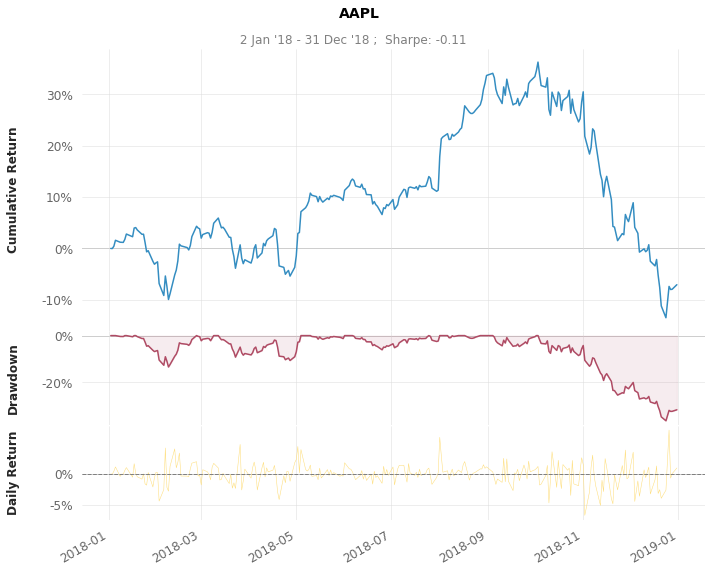

In [ ]:
warnings.filterwarnings('ignore')

retornos = fechamento.vbt.to_returns()
retornos.vbt.returns.qs.plot_snapshot(title=codigo)

# Analisando Estratégias de Trade

## Simple Moving Averages

In [ ]:
n_periodos_curta = 20
n_periodos_longa = 50

media_curta = vbt.MA.run(fechamento, n_periodos_curta, short_name='media_curta')
media_longa = vbt.MA.run(fechamento, n_periodos_longa, short_name='media_longa')

fig = fechamento.vbt.plot(trace_kwargs=dict(name='Preço de Fechamento'))
media_curta.ma.vbt.plot(trace_kwargs=dict(name='Média Móvel Curta'), fig=fig)
media_longa.ma.vbt.plot(trace_kwargs=dict(name='Média Móvel Longa'), fig=fig)

fig.show()

De acordo com o gráfico notamos que o mercado está uma tendência de baixa, ou seja, na situação apresentada acredito que seja um sinal de compra, visto que de acordo com a média móvel longa, vai chegar um determinado momento em que os preços vão subir

## Relative Strength Index

In [ ]:
rsi = vbt.RSI.run(fechamento)
rsi.plot().show()

o RSI é um indicador de impulso, que mede a frequência com que o preço está mudando. Quando o impulso está aumentando, isso indica que a ação está sendo ativamente comprada no mercado. Se o impulso diminui, é um sinal que as estão ação está caindo, no gráfico podemos notar que a ação em questão se manteve no padrão desejado, ou seja, signifca que tal ação não oscilou muito.

## Stochastics

The TA-Lib Stoch function returns two lines slowk and slowd which can then be used to generate the buy/sell indicators.
A crossover signal occurs when the two lines cross in the overbought region (commonly above 80) or oversold region (commonly below 20).
When a slowk line crosses below the slowd line in the overbought region it is considered a sell indicator.
Conversely, when an increasing slowk line crosses above the slowd line in the oversold region it is considered a buy indicator.

In [ ]:
vbt.STOCH.run(precos['High'], precos['Low'], precos['Close']).plot().show()

de modo geral esse indicador compara o preço de fechamento atual com os preços de fechamentos anteriores durante um determinado período, no caso do nosso gráfico notamos que na maioria do tempo ambos estão em sitonia.

## Bollinger Bands

In [ ]:
vbt.BBANDS.run(fechamento).plot().show()

de modo geral sempre que o preço de uma ação chega próximo da borda, normalmente vai haver uma correção de valores, o que significa que no caso em questão vai haver uma alta, visto que o preço da ação chegou no limite da banda inferior.